In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse

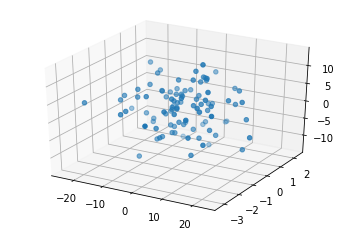

In [2]:
# PCA in 3D
n = 100
points = np.random.randn(100, 3) @ np.diag([10, 1, 5])
### rotate by random angles
theta, phi = np.random.rand(2) * 2 * np.pi
### http://www.bioinfo.rpi.edu/~bystrc/courses/biol4550/lecture3/img006.gif
#points = points @ np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
#points = points @ np.array([[np.cos(phi), 0, -np.sin(phi)], [0, 1, 0], [np.sin(phi), 0, np.cos(phi)]])

### Show ellipsoid
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()

In [3]:
points = np.array([[2, 1], [2.2, 3.5], [2.7, 4], [3,5], [4, 5.3]])
n = points.shape[0]

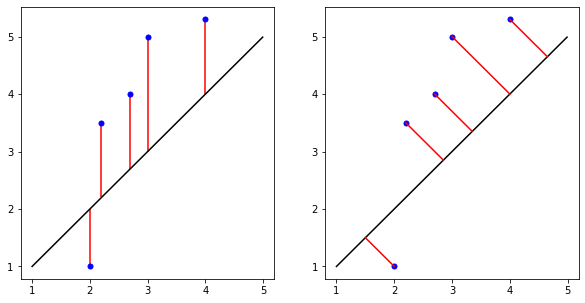

In [4]:
# Draw points and line y = x
x = np.arange(1, 5, 0.01)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ax in [ax1, ax2]:
    ax.plot(points[:, 0], points[:, 1], ".b", ms=10)
    ax.plot(x, x, "k")
# Draw length from each point to line either in terms of y-distance or Euclidean distance
### y-distance:
for j in range(n):    
    ys = [points[j, 0], points[j, 1]]
    ax1.vlines(x=points[j, 0], ymin=np.min(ys), ymax=np.max(ys), color="r")
### Euclidean distance:
for j in range(n):
    init_point = points[j, :]
    if init_point[1] > init_point[0]:
        increment = np.array([0.01, -0.01])
    else:
        increment = np.array([-0.01, 0.01])
    euclid_points = [init_point]
    while not np.isclose(euclid_points[-1][0], euclid_points[-1][1], atol=0.01):
        euclid_points.append(euclid_points[-1]+increment)
    euclid_points = np.stack(euclid_points)
    ax2.plot(euclid_points[:, 0], euclid_points[:, 1], "r")
plt.show()

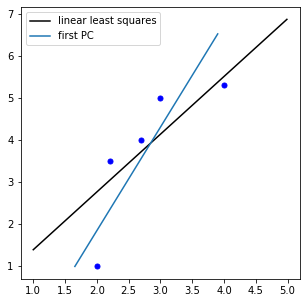

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# Compute best linear least squares fit using
# Moore-Penrose pseudoinverse formula
Y = points[:,1]
X = np.stack([np.zeros(points.shape[0]), points[:,0]], axis=0)
beta = np.linalg.pinv(X).T @ Y

# Plot best linear least squares fit
ax.plot(x, beta[1]*x + beta[0], "k")

# Compute first principal component
point_center = np.mean(points, axis=0)
centered_points = points - point_center
covariance_matrix = np.cov(centered_points.T)
eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

# Plot one-dimensional space corresponding to
# first principal component
t = np.arange(-3, 3, 0.01)
pc_line = np.stack([tt * eigvecs[:, 1] for tt in t], axis=0) + point_center
ax.plot(pc_line[:,0], pc_line[:, 1])

# Plot points and add legend
ax.plot(points[:, 0], points[:, 1], ".b", ms=10)
ax.legend(["linear least squares", "first PC"])

plt.show()

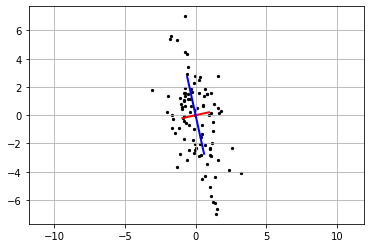

In [6]:
# Draw ellipse and points from 2D Guassian
n = 100
### Sample points from Gaussian
points = np.random.randn(n, 2)
### Scale distribution
a = 3
b = 1
points = points @ np.array([[a, 0], [0, b]])
### Rotate distribution by random angle
theta = np.random.rand() * 2 * np.pi
points = points @ np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

### Scatter points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(points[:, 0], points[:, 1], c="k", s=5)

### Draw axes corresponding to principal components
centered_points = points - np.mean(points, axis=0)
covariance_matrix = np.cov(centered_points.T)
eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

### Draw rays from origin to (scaled) eigenvectors
t = np.arange(-1, 1, 0.01)
first_pc = np.stack([tt  * np.sqrt(eigvals[0]) * eigvecs[:, 0] for tt in t])
second_pc = np.stack([tt  * np.sqrt(eigvals[1]) * eigvecs[:, 1] for tt in t])
ax.plot(first_pc[:, 0], first_pc[:, 1], "r", lw=2)
ax.plot(second_pc[:, 0], second_pc[:, 1], "b", lw=2)


### Center graph at origin
original_x_low, original_x_high = ax.get_xlim()
original_y_low, original_y_high = ax.get_ylim()
bigger_x = np.max([np.abs(original_x_low), np.abs(original_x_high)])
bigger_y = np.max([np.abs(original_y_low), np.abs(original_y_high)])
ax.set_xlim(-bigger_x, bigger_x)
ax.set_ylim(-bigger_y, bigger_y)

### Small embellishments
ax.grid(True)
plt.axis('equal')

plt.show()##

In [7]:
v = first_pc[1] - first_pc[2]
u = second_pc[1] - second_pc[2]
np.dot(u,v)

-2.981555974335137e-19

In [8]:
np.dot(eigvecs[:,0],eigvecs[:,1])

0.0

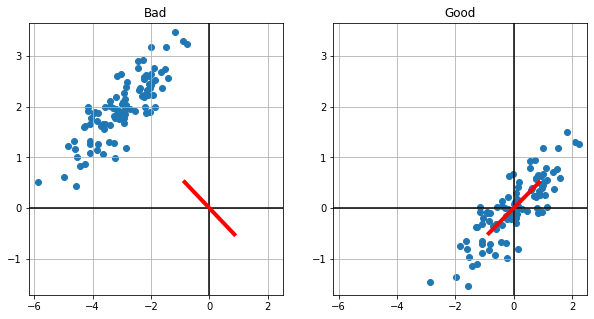

In [9]:
# PCA on uncentered v. centered data
n = 100
points = np.random.randn(n, 2)
### Scale and rotate points
points = points @ np.array([[1, 0], [0, 0.3]])
theta = -np.pi/6
points = points @ np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
### Translate points
centered_points = points - np.mean(points, axis=0)
points += np.array([-3, 2])

### Create graphs
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.scatter(points[:, 0], points[:, 1])
ax2 = fig.add_subplot(122)
ax2.scatter(centered_points[:, 0], centered_points[:, 1])
for ax in [ax1, ax2]:
    ax.grid(True)
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")
    ax.set_xlim(ax1.get_xlim()[0], ax2.get_xlim()[1])
    ax.set_ylim(ax2.get_ylim()[0], ax1.get_ylim()[1])

### Compute and draw first principal components
t = np.arange(-1, 1, 0.01)
for ax, data, label in zip([ax1, ax2], [points, centered_points], ["Bad", "Good"]):
    cov = np.dot(np.transpose(data),data)
    eigvals, eigvecs = np.linalg.eigh(cov)
    eig_axis = np.stack([tt * eigvecs[:, -1] for tt in t])
    ax.plot(eig_axis[:, 0], eig_axis[:, 1], "r", lw=4)
    ax.set_title(label)

plt.show()

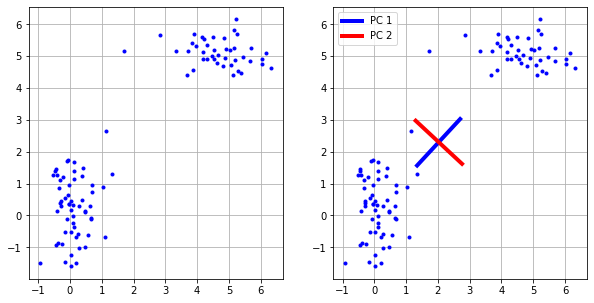

In [10]:
# Mixture of two Gaussians
scaling_mat_a = np.array([[0.5, 0], [0, 1]])
scaling_mat_b = np.array([[1, 0], [0, 0.5]])
def rand_from_gauss_sum():
    point = np.random.randn(2)
    thresh = np.random.rand()
    if thresh <= 0.6:
        # Sample from Gaussian centered at origin with
        # convariance matrix scaling_mat
        point = point @ scaling_mat_a
    else:
        # Sample from Gaussian centered at (5, 5) with
        point = point @ scaling_mat_b + np.array([5, 5])
    return point

# Sample 100 points from mixture
n = 100
points = np.stack([rand_from_gauss_sum() for _ in range(n)], axis=0)

# Plot points
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(points[:, 0], points[:, 1], ".b")

# Plot principal components
ax2 = fig.add_subplot(122)
center_point = np.mean(points, axis=0)
centered_points = points - center_point
t = np.arange(-1, 1, 0.01)
cov = np.dot(np.transpose(centered_points), centered_points)
eigvals, eigvecs = np.linalg.eigh(cov)
eig_axis_1 = np.stack([tt * eigvecs[:, -1] for tt in t])
eig_axis_2 = np.stack([tt * eigvecs[:, 0] for tt in t])
ax2.plot(eig_axis_1[:, 0] + center_point[0], eig_axis_1[:, 1] + center_point[1], "b", lw=4)
ax2.plot(eig_axis_2[:, 0] + center_point[0], eig_axis_2[:, 1] + center_point[1], "r", lw=4)
ax2.legend(["PC 1", "PC 2"])

# Plot points on top of principal components
ax2.plot(points[:, 0], points[:, 1], ".b")
ax1.grid(True)
ax2.grid(True)

plt.show()

In [11]:
import numpy as np

def make_cumulative_prob_fun(probs):
        cumulatives = np.zeros(probs.shape)
        for j in range(cumulatives.shape[0]):
                cumulatives[j] = np.sum(probs[0:(j+1)])
        def find_index(val):
                assert 0 <= val
                assert val <= 1
                ind = 0
                while True:
                        if val <= cumulatives[ind]:
                                return ind
                        else:
                                ind += 1
        return find_index

def mixture_of_gaussians(npoints, probs, means, eigvals, angles):
        """
        Sample points from a multimodal Guassian defined by
        NumPy arrays probs and angles, both of identical shape
        (n, ), with means and eigvals having shape (2, n)
        """
        num_gaussians = probs.shape[0]
        for input_array in [probs, angles]:
                assert input_array.shape == (num_gaussians, )
        for input_array in [means, eigvals]:
                assert input_array.shape == (2, num_gaussians)
        assert np.isclose(np.sum(probs), 1)

        # Generate linear transformation matrices
        scal_mats = [np.diag(eigvals[:, j]) for j in range(eigvals.shape[1])]
        rot_mats = [np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]) for angle in angles]
        lin_mats = [rot_mat @ scal_mat for rot_mat, scal_mat in zip(rot_mats, scal_mats)]

        # Sample points from unit Gaussian in R^2
        unit_gauss_points = np.random.randn(npoints, 2)

        # Assign each row in unit_gauss_points to a Gaussian
        index_sampler = make_cumulative_prob_fun(probs)
        inds = [index_sampler(val) for val in np.random.rand(npoints)]

        # Map the unit Gaussian to Gaussian corresponding to each index
        points = []
        for j, ind in enumerate(inds):
                points.append((lin_mats[ind] @ unit_gauss_points[j, :]) + means[:, ind])
        points = np.stack(points, axis=0)

        return points, inds

In [12]:
npoints = 10000
probs = np.array([0.2, 0.5, 0.3])
means = np.array([[-4, 4, 0], [0, 0, 10]])
eigvals = np.array([[1, 2, 3], [1, 1, 1]])
angles = np.array([np.pi/4, np.pi/2, 0])

points, inds = mixture_of_gaussians(npoints, probs, means, eigvals, angles)

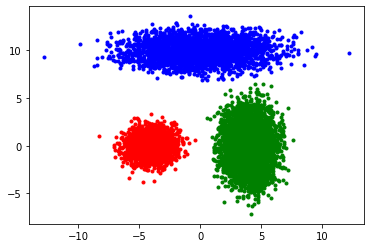

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cols = ["r", "g", "b"]
for j, col in enumerate(cols):
    current_points = np.stack([points[k, :] for k, ind in enumerate(inds) if j == ind], axis=0)
    ax.plot(current_points[:, 0], current_points[:, 1], "."+col)
plt.show()

In [14]:
def sample_gaussians_at_basis_multiples(npoints, k, d, delta):
    """
    sample uniformly from unit Gaussians with means at basis vectors \delta*e_i
    
    npoints: total number of points to sample
    k: number of Guassians
    d: ambient dimension of Gaussians (d > k)
    delta: scaling parameter; the kth Gaussian has mean delta * e_k
    """
    deltaI = delta * np.eye(d)
    points = np.random.randn(npoints, d)
    inds = np.floor(k * np.random.rand(npoints)).astype(np.int)
    for j, ind in enumerate(inds):
        points[j, :] += deltaI[ind, :]
    return points

In [21]:
def scree_for_PCA_clustering(npoints, k, d, delta, ax=None, scree_len=None):
    """
    Make a scree plot for the PCA of points generated by
    sample_gaussians_at_basis_multiples(npoints, k, d, delta)
    
    ax: matplotlib axes object on which to draw plot (default: None)
    """
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    if not scree_len:
        scree_len = d
    
    # Sample and center points
    points = sample_gaussians_at_basis_multiples(npoints, k, d, delta)
    centered_points = points - np.mean(points, axis=0)
    
    # Compute principal components
    cov = np.dot(np.transpose(centered_points), centered_points)
    eigvals, _ = np.linalg.eigh(cov)
    
    # Reverse order of eigenvalues
    eigvals = eigvals[::-1]
    
    # Plot scree plot
    ax.plot(eigvals[0:scree_len], "-o", mfc="w")
    
    # Change ticks to 1-indexing
    ticks = ax.get_xticks()
    ax.set_xticklabels([str(int(val + 1)) for val in ticks])

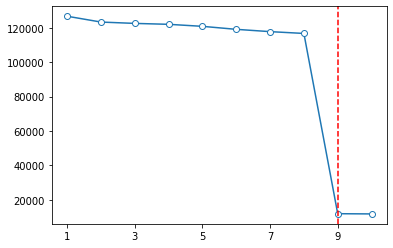

In [25]:
npoints = 10000
k = 9
d = 100
delta = 10
scree_len = 10

fig = plt.figure()
ax = fig.add_subplot(111)
scree_for_PCA_clustering(npoints, k, d, delta, ax=ax, scree_len=scree_len)
ax.axvline(k-1, linestyle="--", c="r")

plt.show()

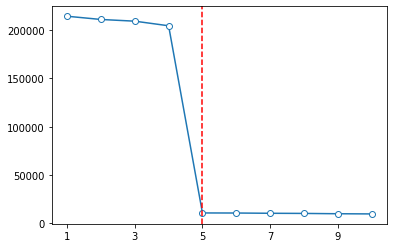

In [26]:
npoints = 10000
k = 5
d = 10
delta = 10

fig = plt.figure()
ax = fig.add_subplot(111)
scree_for_PCA_clustering(npoints, k, d, delta, ax=ax)
ax.axvline(k-1, linestyle="--", c="r")

plt.show()

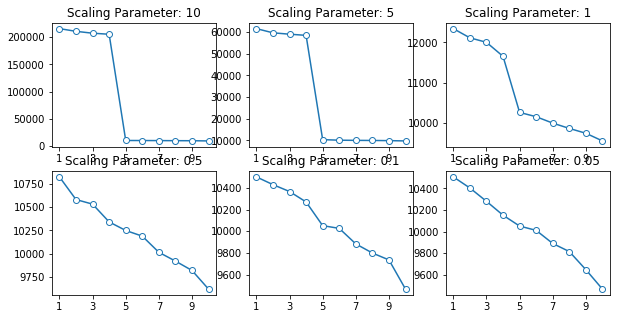

In [28]:
npoints = 10000
k = 5
d = 10
deltas = [10, 5, 1, 0.5, 0.1, 0.05]

fig = plt.figure(figsize=(10, 5))
axs = []
for j in range(6):
    axs.append(fig.add_subplot(231+j))
for delta, ax in zip(deltas, axs):
    scree_for_PCA_clustering(npoints, k, d, delta, ax=ax)
    ax.set_title("Scaling Parameter: "+str(delta))

plt.show()

In [2]:
from mnist import MNIST
mndata = MNIST("mnist_data")
images, labels = mndata.load_training()

